<a href="https://colab.research.google.com/github/ellerybledsoe/Capstone-2/blob/main/Capstone_3_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import numpy as np
# import cv2
# import struct


# def extract_labels(mnist_label_file_path, label_file_path):
#     with open(mnist_label_file_path, "rb") as mnist_label_file:
#         # 32 bit integer magic number
#         mnist_label_file.read(4)
#         # 32 bit integer number of items
#         mnist_label_file.read(4)
#         # actual test label
#         label_file = open(label_file_path, "w")
#         label = mnist_label_file.read(1)
#         while label:
#             label_file.writelines(str(label[0]) + "\n")
#             label = mnist_label_file.read(1)
#         label_file.close()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import scipy.io


In [7]:
j_image = plt.imread('/content/train_4a_00000.png')

type(j_image)

numpy.ndarray

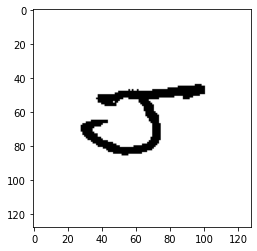

In [8]:
plt.imshow(j_image)

In [10]:
j_image[0][0]

array([1., 1., 1.], dtype=float32)

In [11]:
j_image.size

49152

In [12]:
mat = scipy.io.loadmat('emnist-byclass.mat')

In [13]:
type(mat)

dict

In [22]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'dataset'])

In [39]:
type(mat['dataset'][0:1][0])

numpy.ndarray

In [40]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [41]:
(ds_train, ds_test), ds_info = tfds.load(
    # 'emnist',
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/emnist/byclass/3.0.0.incompleteS990N5/emnist-train.tfrecord


  0%|          | 0/697932 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/emnist/byclass/3.0.0.incompleteS990N5/emnist-test.tfrecord


  0%|          | 0/116323 [00:00<?, ? examples/s]

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.0.0. Subsequent calls will reuse this data.


In [42]:
type(ds_train)

tensorflow.python.data.ops.dataset_ops._OptionsDataset

In [44]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [58]:
type(ds_info)

tensorflow_datasets.core.dataset_info.DatasetInfo

ValueError: ignored

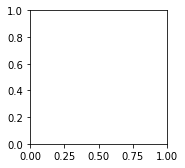

In [62]:
tfds.visualization.show_examples(
    ds_train,
    ds_info)

In [56]:
tfds.show_examples('emnist', True)

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


AttributeError: ignored

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [46]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [48]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
5453/5453 [==============================] - 41s 7ms/step - loss: nan - sparse_categorical_accuracy: 0.0496 - val_loss: nan - val_sparse_categorical_accuracy: 0.0497
Epoch 2/6
5453/5453 [==============================] - 23s 4ms/step - loss: nan - sparse_categorical_accuracy: 0.0496 - val_loss: nan - val_sparse_categorical_accuracy: 0.0497
Epoch 3/6
5453/5453 [==============================] - 23s 4ms/step - loss: nan - sparse_categorical_accuracy: 0.0496 - val_loss: nan - val_sparse_categorical_accuracy: 0.0497
Epoch 4/6
5453/5453 [==============================] - 23s 4ms/step - loss: nan - sparse_categorical_accuracy: 0.0496 - val_loss: nan - val_sparse_categorical_accuracy: 0.0497
Epoch 5/6
5453/5453 [==============================] - 23s 4ms/step - loss: nan - sparse_categorical_accuracy: 0.0496 - val_loss: nan - val_sparse_categorical_accuracy: 0.0497
Epoch 6/6
5453/5453 [==============================] - 23s 4ms/step - loss: nan - sparse_categorical_accuracy: 0.0496 - 